In [19]:
import pandas as pd
from sklearn import tree

In [20]:
dt = tree.DecisionTreeClassifier(max_depth=5, min_samples_split=5, criterion='entropy')

In [21]:

df = pd.read_csv('https://stepik.org/media/attachments/course/4852/train_data_tree.csv')
df.head()

,sex,exang,num
0,1,1,1
1,1,1,1
2,1,0,1
3,1,0,0
4,1,0,1


In [22]:
X_train = df.drop('num', axis=1)
y_train = df.num

In [23]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=5)

[Text(0.5, 0.8333333333333334, 'exang <= 0.5\nentropy = 0.996\nsamples = 238\nvalue = [128, 110]'),
 Text(0.25, 0.5, 'sex <= 0.5\nentropy = 0.903\nsamples = 157\nvalue = [107, 50]'),
 Text(0.375, 0.6666666666666667, 'True  '),
 Text(0.125, 0.16666666666666666, 'entropy = 0.612\nsamples = 53\nvalue = [45, 8]'),
 Text(0.375, 0.16666666666666666, 'entropy = 0.973\nsamples = 104\nvalue = [62, 42]'),
 Text(0.75, 0.5, 'sex <= 0.5\nentropy = 0.826\nsamples = 81\nvalue = [21, 60]'),
 Text(0.625, 0.6666666666666667, '  False'),
 Text(0.625, 0.16666666666666666, 'entropy = 0.954\nsamples = 16\nvalue = [6, 10]'),
 Text(0.875, 0.16666666666666666, 'entropy = 0.779\nsamples = 65\nvalue = [15, 50]')]

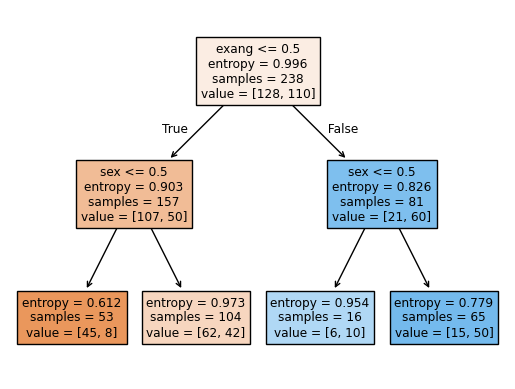

In [24]:
tree.plot_tree(dt, filled=True, feature_names=list(X_train))

IG = E - (n1*E1 + n2*E2) / (n1 + n2)  = 0.119

n1, n2 - сэмплы

In [37]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris


iris = load_iris()
X = iris.data
y = iris.target

dt = DecisionTreeClassifier(criterion='entropy')
# разбиваем DataFrame на подмножества test и train в пропорции 0.75-train, а 0.25-test.
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.75)
dt.fit(X_train, y_train)
predicted = dt.predict(X_test)

Одним из способов найти более-менее оптимальный набор параметров дерева является перебор множества деревьев с разными параметрами и выбор подходящего.

Для этой цели существует класс GridSearchCV, перебирающий каждое из сочетаний параметров среди заданных для модели, обучающий её на данных и проводящих кросс-валидацию. После этого в аттрибуте .best_estimator_ храниться модель с лучшими параметрами.

Это применимо не только к деревьям, но и к другим моделям sklearn.

Теперь задание - осуществите перебор всех деревьев на данных ириса по следующим параметрам:

максимальная глубина - от 1 до 10 уровней

минимальное число проб для разделения - от 2 до 10

минимальное число проб в листе - от 1 до 10

и сохраните в переменную best_tree лучшее дерево

In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_iris


iris = load_iris()
X = iris.data
y = iris.target
clf = DecisionTreeClassifier()

In [40]:
params = {"max_depth": range(1, 11), 
     "min_samples_split": range(2, 11),
     "min_samples_leaf" : range(1, 10)}
search = GridSearchCV(param_grid=params, estimator=clf)

In [41]:
search.fit(X, y)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(1, 11),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 11)})

In [43]:
best_tree = search.best_estimator_
best_tree

DecisionTreeClassifier(max_depth=3, min_samples_split=4)